# SymBeam playground
[SymBeam](https://github.com/amcc1996/symbeam) is a pedagogical Python package for bending diagrams computation, aimed at Mechanical, Civil and Industrial Engineering students.
If you are not familiar with SymBeam yet, check the [main page](https://github.com/amcc1996/symbeam) to learn more on its features, usage and numerous examples.

This interactive Jupyter Python Notebook serves the purpose of providing an easy access-point to SymBeam capabilities for students not so comfortable to Python computational enviroment, so that they can equally take advantage of this tool for their study.

The sections below have been structured to encompass a sufficiently comprehensive range of SymBeam's useful features which shall hopefully suffice for the study of several students. In any case, if you have suggestions for improving SymBeam or found some limitation, please visit the [project page](https://github.com/amcc1996/symbeam) or contact [me](https://github.com/amcc1996/symbeam/blob/master/SUPPORT.md)!


## How to use this notebook
The notebook is divided into text and code sections. The text blocks are essentially aimed at explaining the syntax. If by mistake you start editing one, just click elsewhere in the notebook or press ESC.

The code blocks can be executed each one at a time. To run a block o code just click the run button on the top toolbar. In the *Cell* tab, you can find further options, like running all code in the notebook, which can be extremely useful.

Always start by running the code in **Installing and importing SymBeam** and finish by executing **Solve the problem and plot the results**.

If you make some alteration in a code block, make sure to run every following block to avoid unexpected behaviour. To keep it simple, you can simply run all the code in the notebook to be certain you did not miss any step!


## Installing and importing SymBeam
 **Warning** - These lines are simple formalities but are mandatory to setup a proper environment. Do not change them unless you are aware of the consequences.

In [3]:
!pip3 install symbeam
%matplotlib inline
from symbeam import beam

## Define the length of the beam



In [4]:
new = beam(length = 'L')

## Set the Young modulus and second moment of area of beam segments

In [5]:
new.set_young(x_start = 0, x_end = 'L', value = 210e9)
new.set_inertia(x_start = 0, x_end = 'L', value = 5e-6)

## Add supports
Options are `pin`, `roller`, `hinge` and `fixed`

In [6]:
new.add_support(x_coord = 0, support_type = 'fixed')
new.add_support(x_coord = 'L/2', support_type = 'hinge')
new.add_support(x_coord = '3*L/4', support_type = 'roller')

## Add loads
Apply external loads to the beam. These can be point forces, point moments or distributed forces.

In [7]:
new.add_point_load(x_coord = 'L', value = '-P')
new.add_point_moment(x_coord = 'L/4', value = 'P*L')
new.add_distributed_load(x_start = 0, x_end = 'L/2', expression = '-P * x / L')

## Solve the problem and plot the results

**Warning** - The following lines do all the work in SymBeam. Be careful with modifying or removing them, as you will incur is a severe loss of utility of SymBeam.

In [8]:
new.solve()


                                    Beam points                                    
     Coordinate              Type                 Load                Moment       
-----------------------------------------------------------------------------------
         0                  Fixed                  0                    0          
        L/4            Continuity point            0                   L*P         
        L/2                 Hinge                  0                    0          
       3*L/4                Roller                 0                    0          
         L             Continuity point            -P                   0          


                                   Beam segments                                   
        Span            Young modulus           Inertia          Distributed load  
-----------------------------------------------------------------------------------
 [   0   -  L/4  ]     210000000000.000   5.00000000000000e-6         -P*

(<Figure size 504x576 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='Shear force, $V(x)$'>,
        <AxesSubplot:ylabel='Bending moment, $M(x)$'>,
        <AxesSubplot:xlabel='Coordinate, $x$', ylabel='Deflection, $v(x)$'>],
       dtype=object))

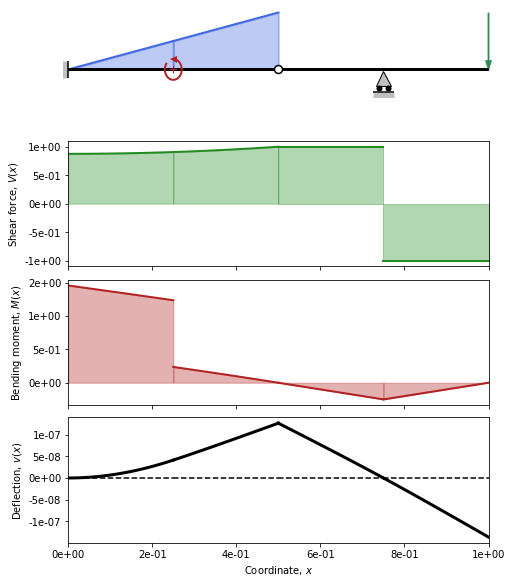

In [9]:
new.plot()